In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [3]:
#read file
one = []
with open("In-class_network.txt","r") as f:
    for line in f:
        line = line.strip().split("\t")
        one.append(line)
one=pd.DataFrame(one[1:],columns=one[0])

In [4]:
#區分nodes和edges
ID=[]
ID_node=[]
for i in range(len(one)):
    if one["IDs-of-acquaintances"][i]==" ":
        ID_node.append(int(one["ID"][i]))
    if one["IDs-of-acquaintances"][i]!=" ":    
        ID.append(one["ID"][i])
        ID.append(one["IDs-of-acquaintances"][i])

for i in range(1,len(ID),2):
    ID[i]=ID[i].split(",")

number=[]
for j in range(1,len(ID),2):
    for k in range(len(ID[j])):
        number.append((int(ID[j-1]),int(ID[j][k])))

In [5]:
#把nodes和edges加到Ｇ裡面
G=nx.Graph()
G.add_nodes_from(ID_node)
G.add_edges_from(number)

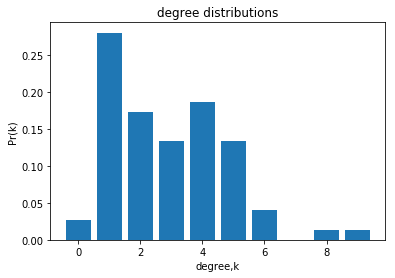

In [6]:
def degree_distributions(G):
    #個別的degree
    G_degree=[]
    for i in range(len(G.degree())):
        G_degree.append(G.degree()[i])
    #按照大小排列degree 還有算出有幾個
    G_degree_count=[]
    for i in range(len(sorted(G_degree))):
        G_degree_count.append((sorted(G_degree)[i],G_degree.count(sorted(G_degree)[i])))

    G_degree_count=pd.DataFrame(list(set(G_degree_count)))
    G_degree_count[2]=G_degree_count[1]/sum(G_degree_count[1])
    #draw
    plt.bar(G_degree_count[0],G_degree_count[2])
    plt.title("degree distributions")
    plt.xlabel("degree,k")
    plt.ylabel("Pr(k)")
    plt.show()
degree_distributions(G)

In [8]:
other_G_degree=[]
for i in range(len(G.degree())):
    other_G_degree.append(G.degree()[i])

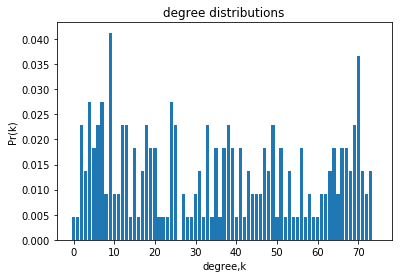

In [12]:
other_G_degree_count=pd.DataFrame(other_G_degree)
other_G_degree_count[1]=other_G_degree_count[0]/sum(other_G_degree_count[0])
plt.bar(other_G_degree_count[0].index,other_G_degree_count[1])
plt.title("degree distributions")
plt.xlabel("degree,k")
plt.ylabel("Pr(k)")
plt.show()